# Lab Assignment 1

**Computer Vision** - Term 5, 2023

Instructor: Dr. Saumya Jetley <br>
TAs: Ribhu Lahiri, Raghav Awasty

For reference: 
* Performing FFT on input images; to edit the frequency content and reconstruct (inverse transform) the image to observe its effect on the original  image
* Through this we’d like to understand the connection between information in the spatial domain and in the frequency domain, and how FFT helps to work between the two
* Frequency content and their relation to perception: https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf

### Part 1: Fast Fourier transformation of images

In [2]:
# Imports
import cv2
import numpy as np
import pandas as pd
import scipy.fftpack as fp
import matplotlib.pyplot as plt

In [ ]:
# !pip install fft_helper

In [3]:
# from fft_helper import *

In [4]:
# Reading in a sample image
import gdown

id = "1uN9K0gij30mw9RTnDNT0F4V5cst5NzKQ"
gdown.download(id=id, output='bear.jpeg', quiet=True)

id = '18RaIZacQo6wWpqN7Hm_MBgH8LQRc6Eu3'
gdown.download(id=id, output='bean1.jpeg', quiet=True)

id = '1CPMOPN_Hiv7nScv12ZMgUZOmXYNSyhbX'
gdown.download(id=id, output='bean2.jpeg', quiet=True)

'bean2.jpeg'

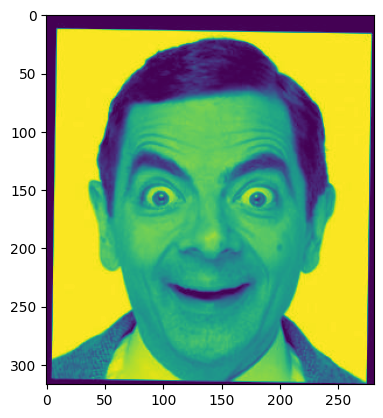

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('bean2.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [6]:
img=img[:256, :256]

In [7]:
# img=img.reshape(256,256)

In [8]:
img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   2,   1, ..., 254, 254, 254],
       [  0,   2,   1, ..., 254, 254, 254],
       [  0,   2,   1, ..., 254, 254, 254]], dtype=uint8)

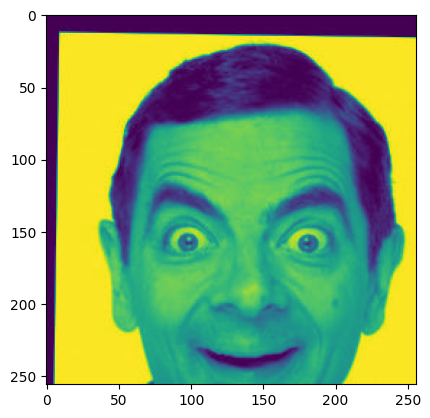

In [9]:
imgplot = plt.imshow(img)
plt.show()

#### different things I have tried

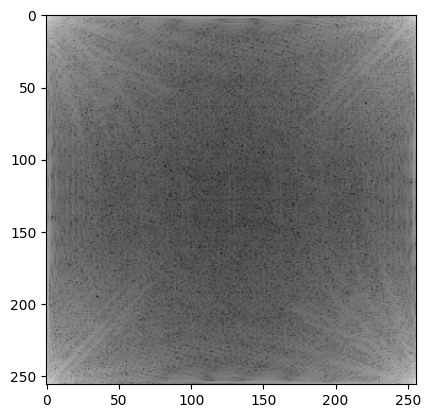

In [10]:
import numpy as np
from PIL import Image


fft_image = np.fft.fft2(img)

fft_image_log = np.log(np.abs(fft_image))
import matplotlib.pyplot as plt
plt.imshow(fft_image_log, cmap='gray')
plt.show()


In [11]:
fft_image_log.shape

(256, 256)

In [12]:
# image = Image.open('bean2.jpeg')

# # Convert the image to a NumPy array
# image_array = np.array(image)

In [13]:
# image_array

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten image into 1D array
img_flat = img.flatten()

In [17]:
img.shape

(256, 256)

In [18]:
img_flat

array([  0,   0,   0, ..., 254, 254, 254], dtype=uint8)

In [19]:
# img_fft = np.fft.fft(img_flat)

# fft_image_log = np.log(np.abs(img_fft))


# fft_image_log 

#### trying my fft code on this bean image first

In [23]:

def FFT(x):
   
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X


In [24]:
img_flat.shape

(65536,)

In [25]:
fft_image_log.shape

(256, 256)

In [26]:
X = FFT(img_flat)

In [27]:
fft_image_log.shape

(256, 256)

In [28]:
X

array([10093410.             +0.j        ,
        -125345.90852299+563525.43289492j,
        -387986.78972466+244334.96471139j, ...,
        -170516.86442776+286958.74655435j,
        -387986.78972466-244334.96471139j,
        -125345.90852299-563525.43289492j])

In [29]:
X.shape

(65536,)

In [30]:
X_log=np.log(np.abs(X))

In [31]:
X_log_reshape=X_log.reshape(img.shape)

In [32]:
X_log.shape

(65536,)

In [33]:
X_log_reshape.shape

(256, 256)

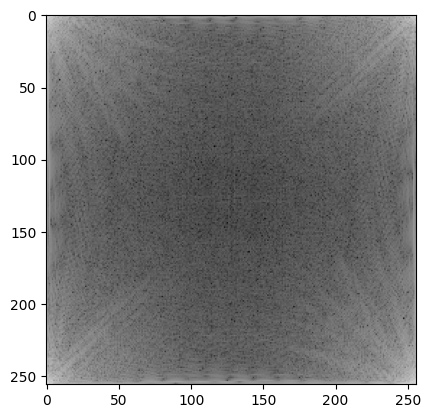

In [34]:
plt.imshow(X_log_reshape, cmap='gray')
plt.show()

In [36]:
def iFFT(X):
    N = len(X)
    
    if N == 1:
        return X
    else:
        X_even = iFFT(X[::2])
        X_odd = iFFT(X[1::2])
        factor = \
          np.exp(2j*np.pi*np.arange(N)/ N)
        
        x = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return x/N


In [37]:
X_dash=iFFT(X)

In [38]:
X_dash

array([1.47158666e-49-6.45906816e-50j, 1.27290419e-49-9.72637770e-50j,
       1.22111938e-49-6.01585490e-50j, ...,
       1.91088362e-34+1.68635522e-49j, 1.91088362e-34+1.47428098e-49j,
       1.91088362e-34+1.59392761e-49j])

In [39]:
X_log_dash=np.log(np.abs(X_dash))
X_log_dash

array([-112.35223969, -112.35543515, -112.51825643, ...,  -77.6403274 ,
        -77.6403274 ,  -77.6403274 ])

In [40]:
X_log_dash_reshape=X_log_dash.reshape(img.shape)
X_log_dash_reshape.shape

(256, 256)

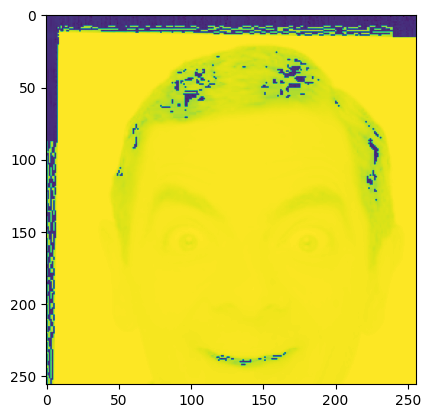

In [41]:
plt.imshow(X_log_dash_reshape)
plt.show()

### checking using inbuilt numpy fft

In [42]:
t = np.fft.ifft(X)

In [43]:
t.shape

(65536,)

In [44]:
t=np.log(np.abs(t))

In [45]:
t=t.reshape(img.shape)

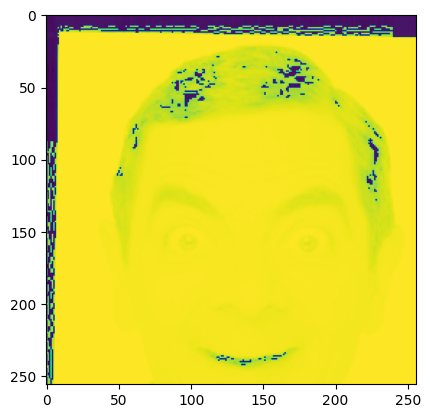

In [46]:
plt.imshow(t)
plt.show()

In [47]:
# Task 1.a: 1 point
def fft(x):
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = fft(x[::2])
        X_odd = fft(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X
    

# Task 1.b: 1 point
def inv_fft(X):
    '''
    Inverts a fourier transformed image back to an image

    Parameters
    -----------
    image: np.ndarray
        An ff transformed image array

    Returns:
    -----------------------
    ifft_image: np.ndarray
        A numpy array of reconstructed image
    '''
    # TODO: YOUR CODE HERE
    N = len(X)
    
    if N == 1:
        return X
    else:
        X_even = inv_fft(X[::2])
        X_odd = inv_fft(X[1::2])
        factor = \
          np.exp(2j*np.pi*np.arange(N)/ N)
        
        x = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return x/N
    
    
    

# Task 1.c: 1 point
def fft_shift(x):
    '''
    Shift the zero-frequency component to the center of the spectrum

    Parameters
    -----------
    image: np.ndarray
        An ff transformed image array

    Returns:
    -----------------------
    fft_shifted: np.ndarray
        A numpy array of shifted spectrum
    '''
    # TODO: YOUR CODE HERE
    m, n = x.shape
    p2 = (m+1)//2
    q2 = (n+1)//2
    shifted_x = np.empty_like(x)
    shifted_x[:p2, :q2] = x[p2:, q2:]
    shifted_x[:p2, q2:] = x[p2:, :q2]
    shifted_x[p2:, :q2] = x[:p2, q2:]
    shifted_x[p2:, q2:] = x[:p2, :q2]
    return shifted_x



# Task 1.d: 1 point
def inv_fft_shift(x):
    '''
    Inverse shift to decentralise the origin

    Parameters
    -----------
    image: np.ndarray
        A shifted ff transformed image array

    Returns:
    -----------------------
    fft_shifted: np.ndarray
        A numpy array of decentralised spectrum
    '''
    # TODO: YOUR CODE HERE
    m, n = x.shape

    shift_m = (m + 1) // 2
    shift_n = (n + 1) // 2
    slice1 = slice(shift_m, m)
    slice2 = slice(0, shift_m)
    slice3 = slice(shift_n, n)
    slice4 = slice(0, shift_n)
    y = np.empty_like(x)
    y[slice1, slice3] = x[slice2, slice4]
    y[slice1, slice4] = x[slice2, slice3]
    y[slice2, slice3] = x[slice1, slice4]
    y[slice2, slice4] = x[slice1, slice3]

    return y

    

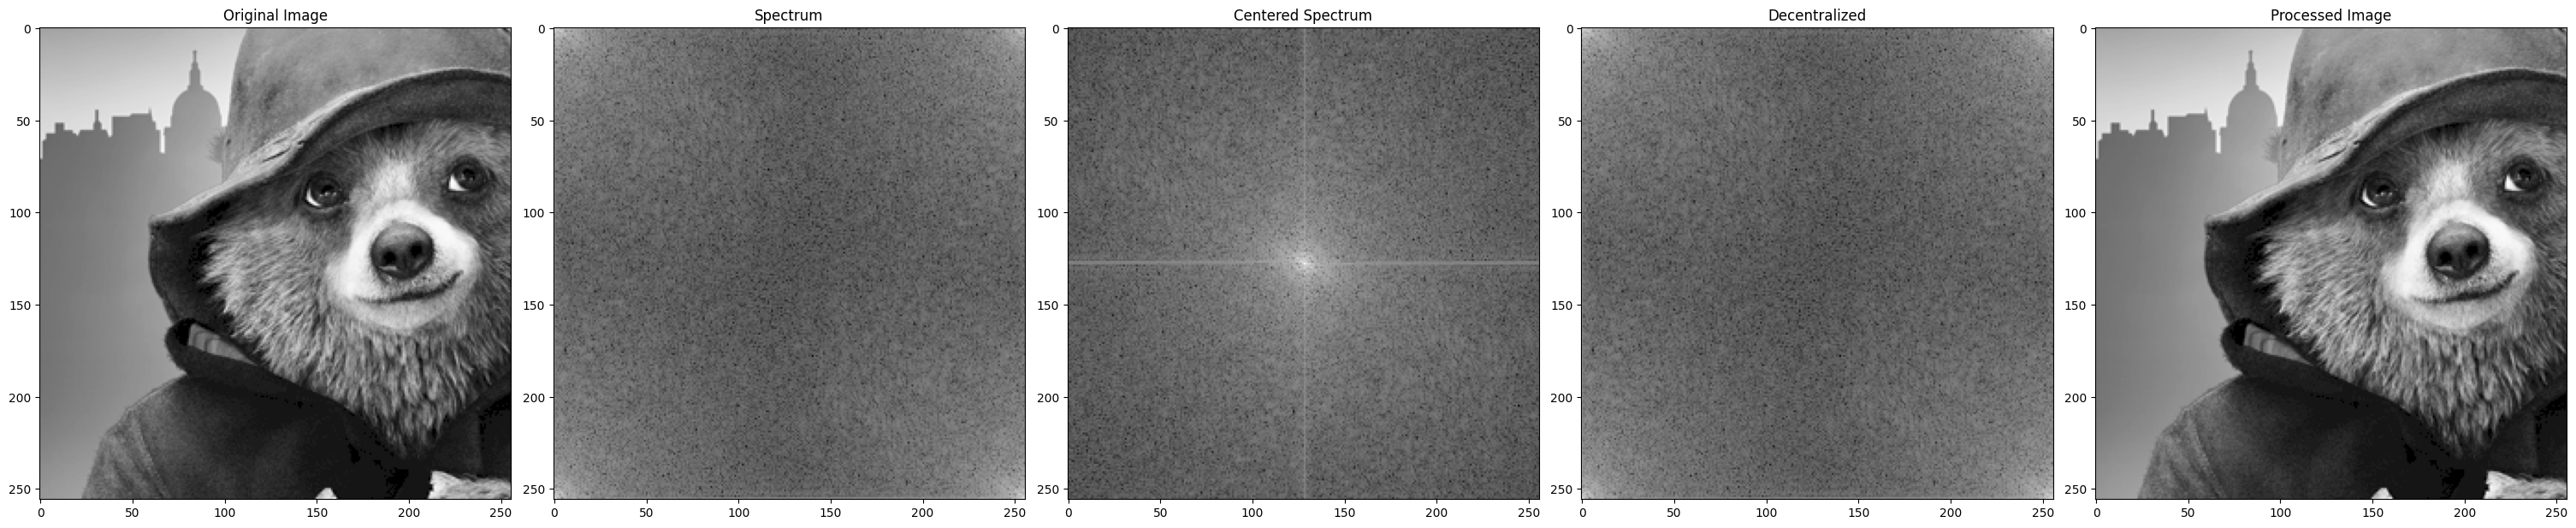

In [48]:
plt.figure(figsize=(30, 20), constrained_layout=False)

img_c1 = cv2.imread("bear.jpeg", 0)
img_c1=img_c1[:256, :256]
img_c1_reshape= img_c1.flatten()
img_c2 = fft(img_c1_reshape)
img_c2=img_c2.reshape(256,256)
img_c3 = fft_shift(img_c2)
img_c4 = inv_fft_shift(img_c3)
img_c4_reshape=img_c4.flatten()
img_c5 = inv_fft(img_c4_reshape)
img_c5 = img_c5.reshape(256,256)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(np.abs(img_c2)), "gray"), plt.title("Spectrum");
plt.subplot(153), plt.imshow(np.log(np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")
plt.show()

In [49]:
img_c4.shape

(256, 256)

### Part 2: Low pass and High pass filters

Low pass

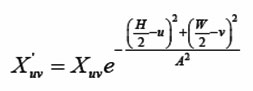

High pass

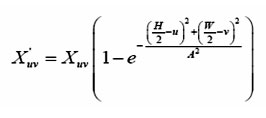

In [50]:
# Feel free to create any helper functions

# Task 2.a: 1 point
def gaussian_low_pass(A, shape):
    '''
    Creates gaussian low pass filter for a given image

    Parameters
    -----------
    A: int
      A constant 
    
    shape: list or tuple
        The dimensions of the image (in 2D)

    Returns:
    -----------------------
    filter: np.ndarray
        A numpy array of the low pass filter
    '''
    filter_shape = shape
    center = [shape[0] // 2, shape[1] // 2]
    filter = np.zeros(filter_shape)

    std_dev = shape[0] / A

    for i in range(filter_shape[0]):
        for j in range(filter_shape[1]):
            filter[i][j] = np.exp(-((i-center[0])**2 + (j-center[1])**2) / (2*std_dev**2))
 
    filter /= np.sum(filter)
    
    return filter
    

# Task 2.b: 1 point
def gaussian_high_pass(A, shape):
    '''
    Creates gaussian high pass filter for a given image

    Parameters
    -----------
    A: int
      A constant 
    
    shape: list or tuple
        The dimensions of the image (in 2D)

    Returns:
    -----------------------
    filter: np.ndarray
        A numpy array of the high pass filter
    '''
    # TODO: YOUR CODE HERE
    filter_shape = shape
    center = [shape[0] // 2, shape[1] // 2]
 
    filter = np.zeros(filter_shape)

    std_dev = shape[0] / A

    for i in range(filter_shape[0]):
        for j in range(filter_shape[1]):
            filter[i][j] = 1 - np.exp(-((i-center[0])**2 + (j-center[1])**2) / (2*std_dev**2))

    filter /= np.sum(filter)
    
    return filter

    


C:\Users\Paul\AppData\Local\Temp\ipykernel_16540\1208107440.py:28: RuntimeWarning: divide by zero encountered in log
  plt.subplot(236), plt.imshow(np.log(np.abs(HPcenter)), "gray"), plt.title("Shifted High Pass FFT")


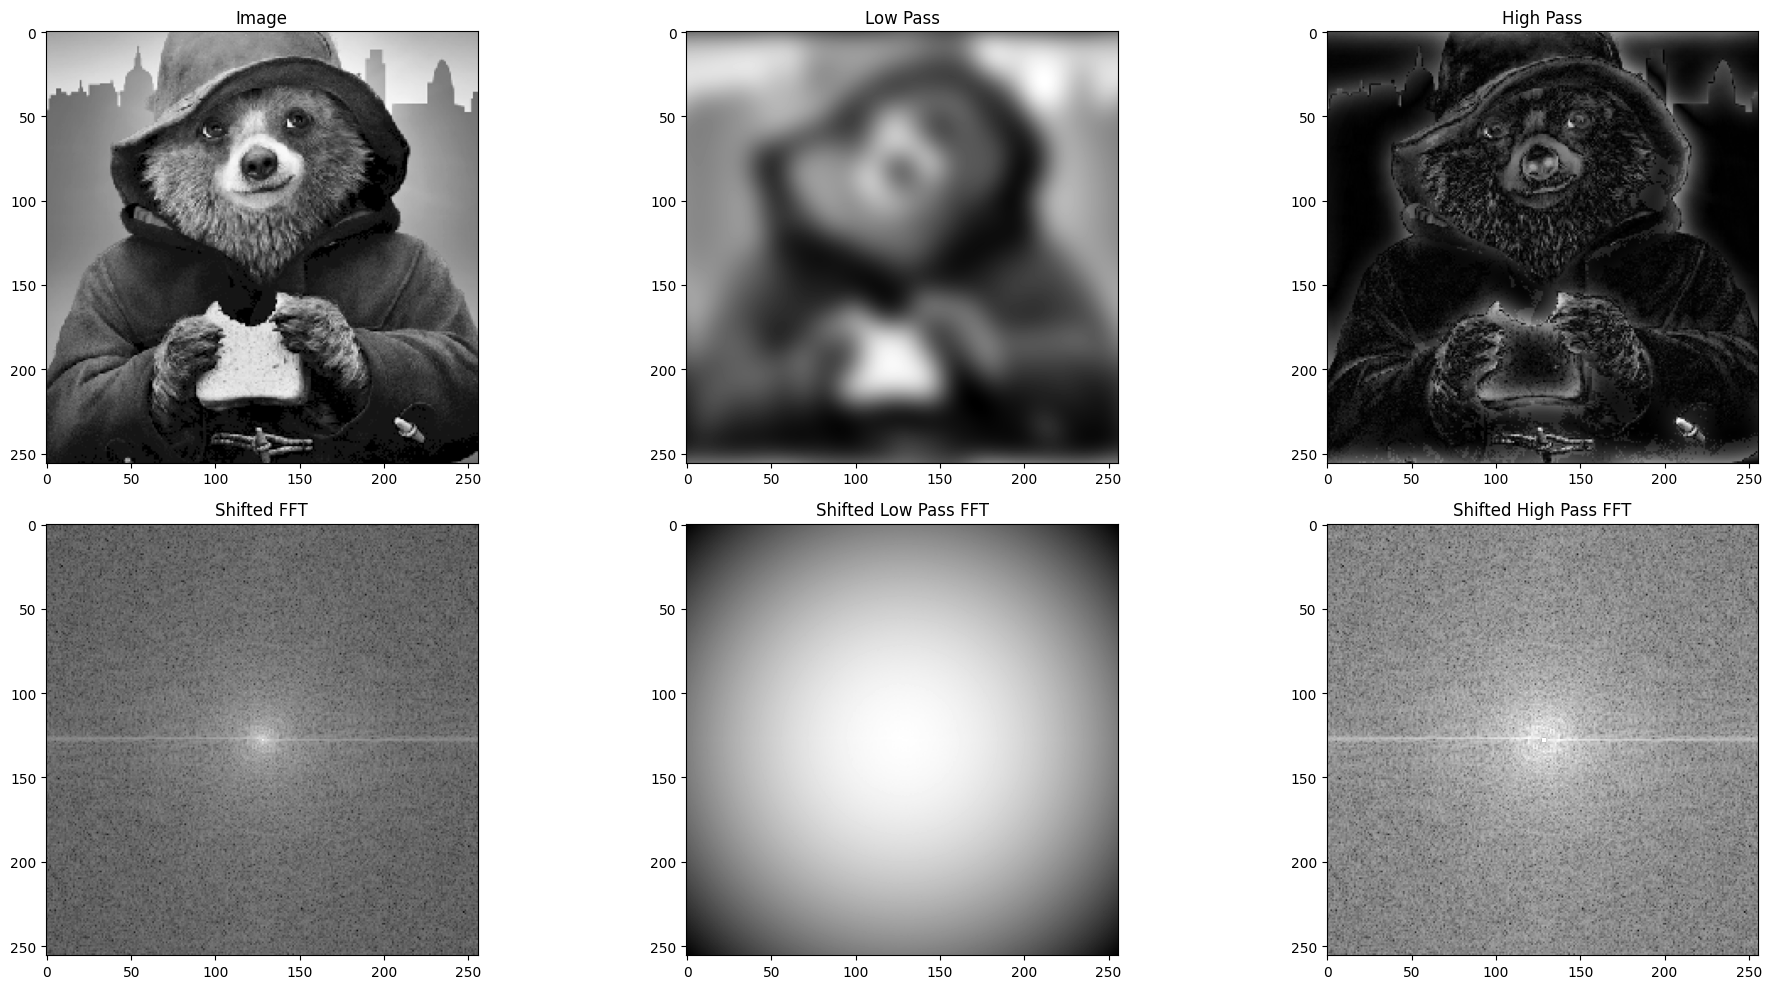

In [51]:
img = cv2.imread('./bear.jpeg', 0)
img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_NEAREST)
img_flat=img.flatten()
original = fft(img_flat)
original=original.reshape(256,256)
shifted = fft_shift(original)

# Finding the low pass frequency output and its corresponding invert
LPcenter = shifted * gaussian_low_pass(50, img.shape)
low_pass = inv_fft_shift(LPcenter)
low_pass=low_pass.flatten()
inverse_low_pass = inv_fft(low_pass)
inverse_low_pass_reshape=inverse_low_pass.reshape(256,256)

# Finding the high pass frequency output and its corresponding invert
HPcenter = shifted * gaussian_high_pass(50, img.shape)
high_pass = inv_fft_shift(HPcenter)
high_pass=high_pass.flatten()
inverse_high_pass = inv_fft(high_pass)
inverse_high_pass_reshape=inverse_high_pass.reshape(256,256)

plt.figure(figsize=(20, 10), constrained_layout=False)
plt.subplot(231), plt.imshow(img, "gray"), plt.title("Image")
plt.subplot(232), plt.imshow(np.abs(inverse_low_pass_reshape), "gray"), plt.title("Low Pass")
plt.subplot(233), plt.imshow(np.abs(inverse_high_pass_reshape), "gray"), plt.title("High Pass")
plt.subplot(234), plt.imshow(np.log(np.abs(shifted)), "gray"), plt.title("Shifted FFT")
plt.subplot(235), plt.imshow(np.log(np.abs(LPcenter)), "gray"), plt.title("Shifted Low Pass FFT")
plt.subplot(236), plt.imshow(np.log(np.abs(HPcenter)), "gray"), plt.title("Shifted High Pass FFT")
plt.tight_layout()
plt.show();

In [52]:
low_pass.shape

(65536,)

In [56]:
# # You can also play with combining these outputs to sharpen images

plt.figure(figsize=(20,10))
plt.subplot(131), plt.imshow(np.abs(img), 'gray'), plt.title('Original')
plt.subplot(132), plt.imshow(np.abs(inverse_low_pass + inverse_high_pass),'gray'), plt.title('Low + High')
plt.subplot(133), plt.imshow(np.abs(img + inverse_high_pass),'gray'), plt.title('Sharpened')
plt.show()

### Part 3: Filters in the FFT domain

In [54]:
def filter(mask, image):
    return mask * image

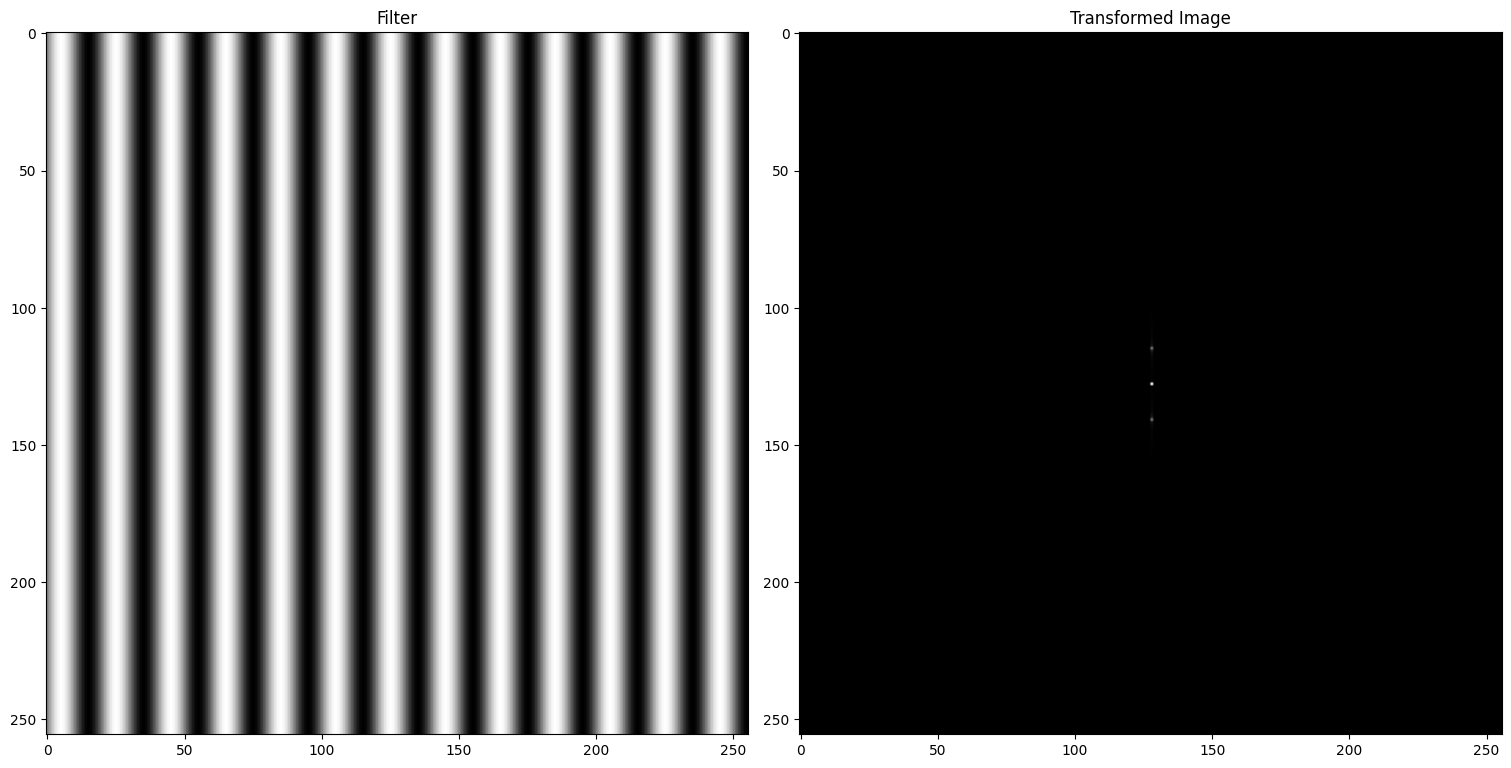

In [65]:
x = np.arange(shifted.shape[1])  # generate 1-D sine wave of required period 
y = np.sin(2 * np.pi * x / 20)

y += max(y)

mask = np.array([[y[j]*127 for j in range(shifted.shape[1])] for i in range(shifted.shape[0])], dtype=np.uint8)
mask_flat= mask.flatten()
masked = filter(mask, shifted)
fft_mask = fft_shift(fft(mask_flat).reshape(256,256))
masked_flat=masked
inv_mask = inv_fft_shift(masked_flat)
inv_mask_flat=inv_mask.flatten()
invert = inv_fft(inv_mask_flat)

plt.figure(figsize=(15, 10), constrained_layout=False)
plt.subplot(121), plt.imshow(mask, "gray"), plt.title("Filter")
plt.subplot(122), plt.imshow(np.abs(fft_mask), "gray"), plt.title("Transformed Image")
plt.show()

In [62]:
mask_flat.shape

(65536,)

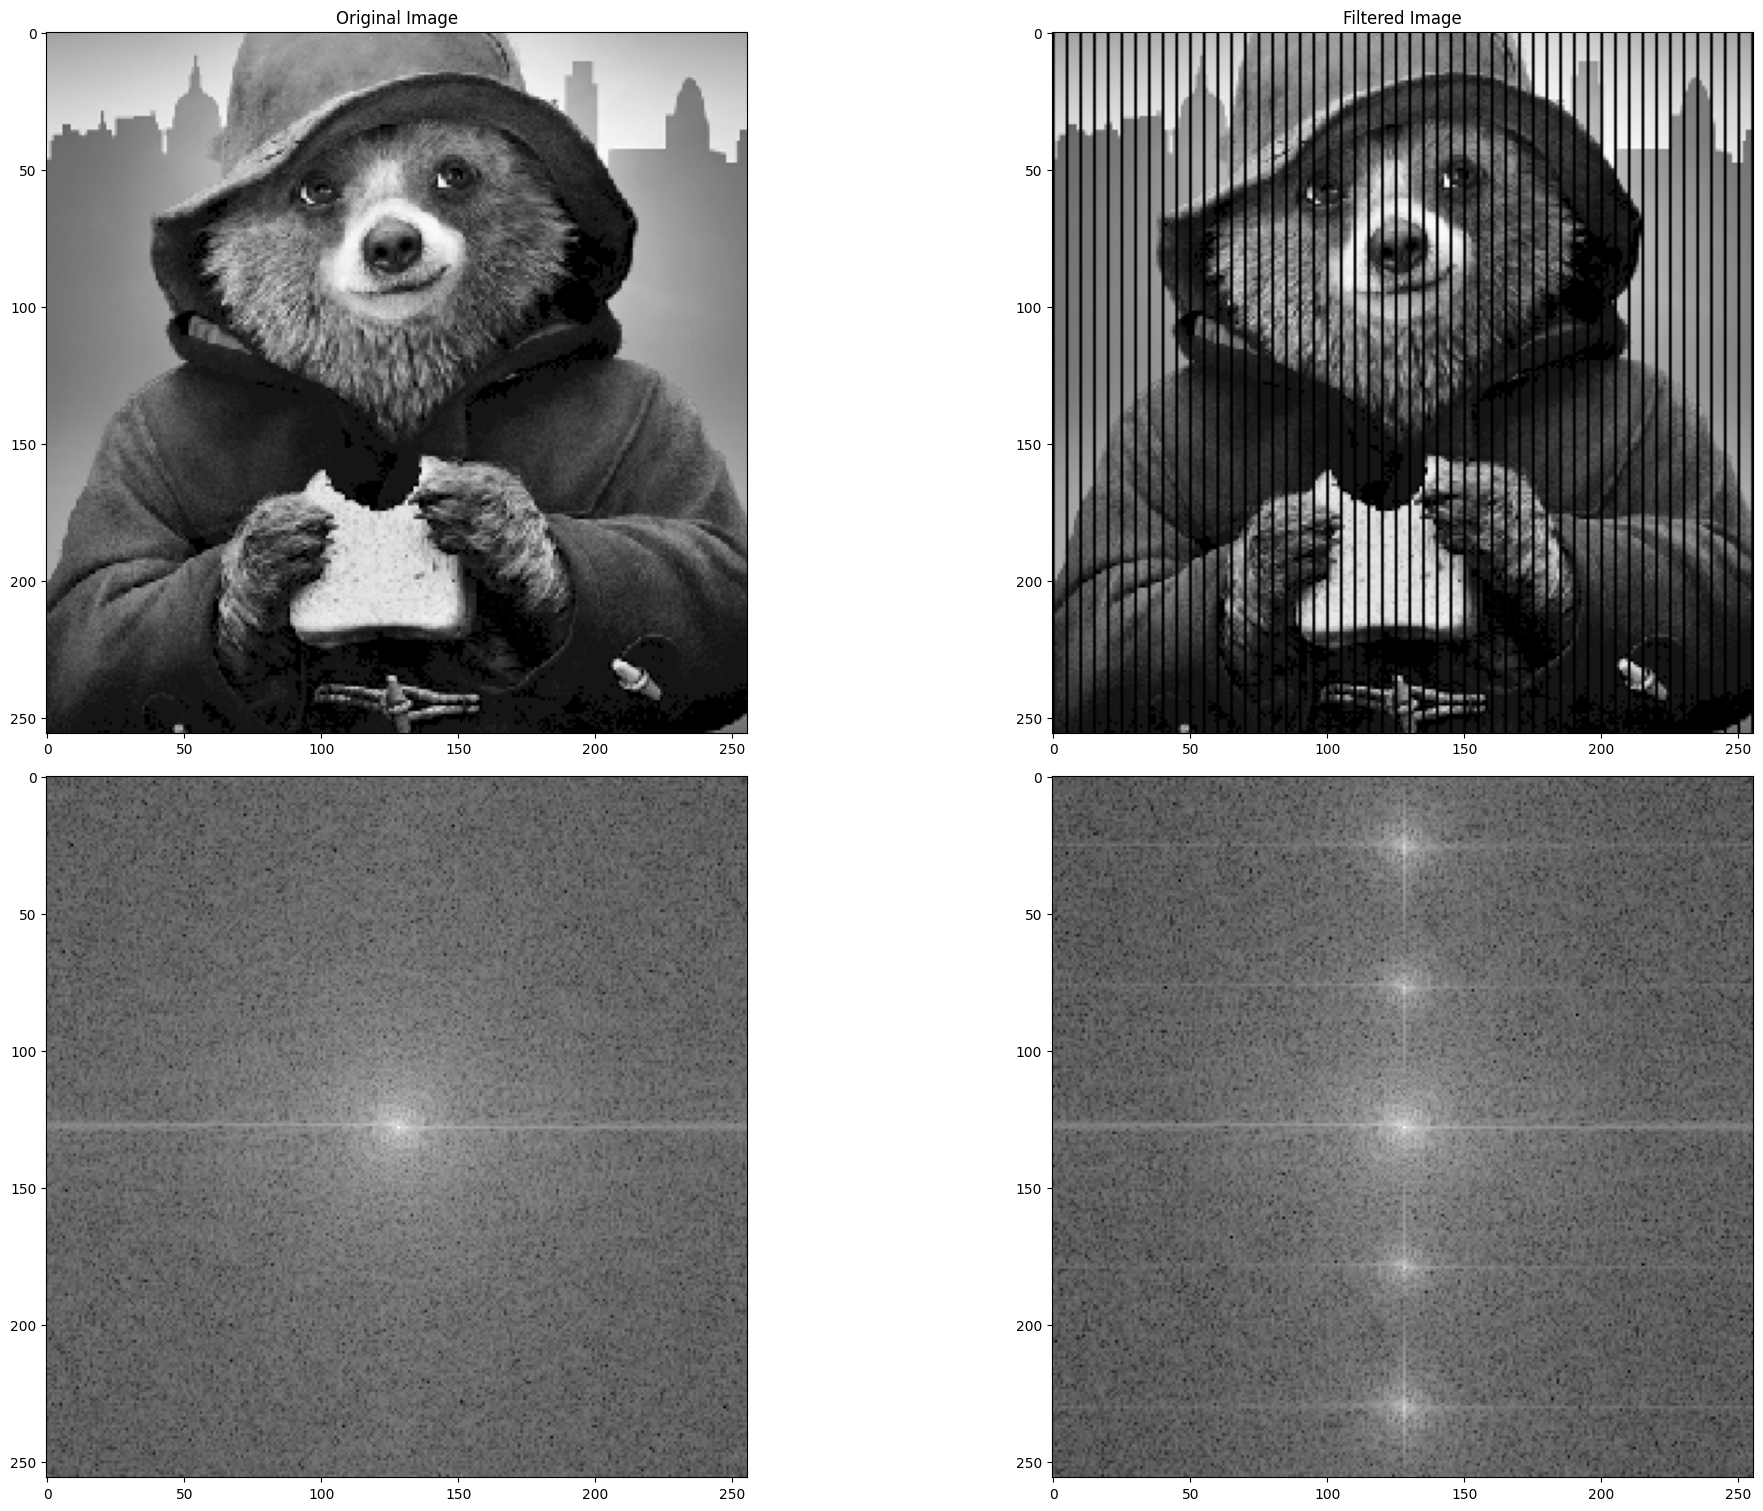

In [70]:
mask = np.ones(img.shape)

for i in range(img.shape[0]):
    for j in range(0, img.shape[1], 5):
        mask[i][j] = 0

filter_img = filter(mask, img)
filter_img_flat=filter_img.flatten()
fft_filtered_img = fft(filter_img_flat)
fft_filtered = fft_shift(fft_filtered_img.reshape(256,256))

fft_img = fft(img.flatten())
fft_center = fft_shift(fft_img.reshape(256,256))

plt.figure(figsize=(20, 15), constrained_layout=False)

plt.subplot(221), plt.imshow(np.abs(img), 'gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(np.abs(filter_img), 'gray'), plt.title('Filtered Image')
plt.subplot(223), plt.imshow(np.log(1+np.abs(fft_center)), 'gray')
plt.subplot(224), plt.imshow(np.log(1+np.abs(fft_filtered)), 'gray')
plt.show()

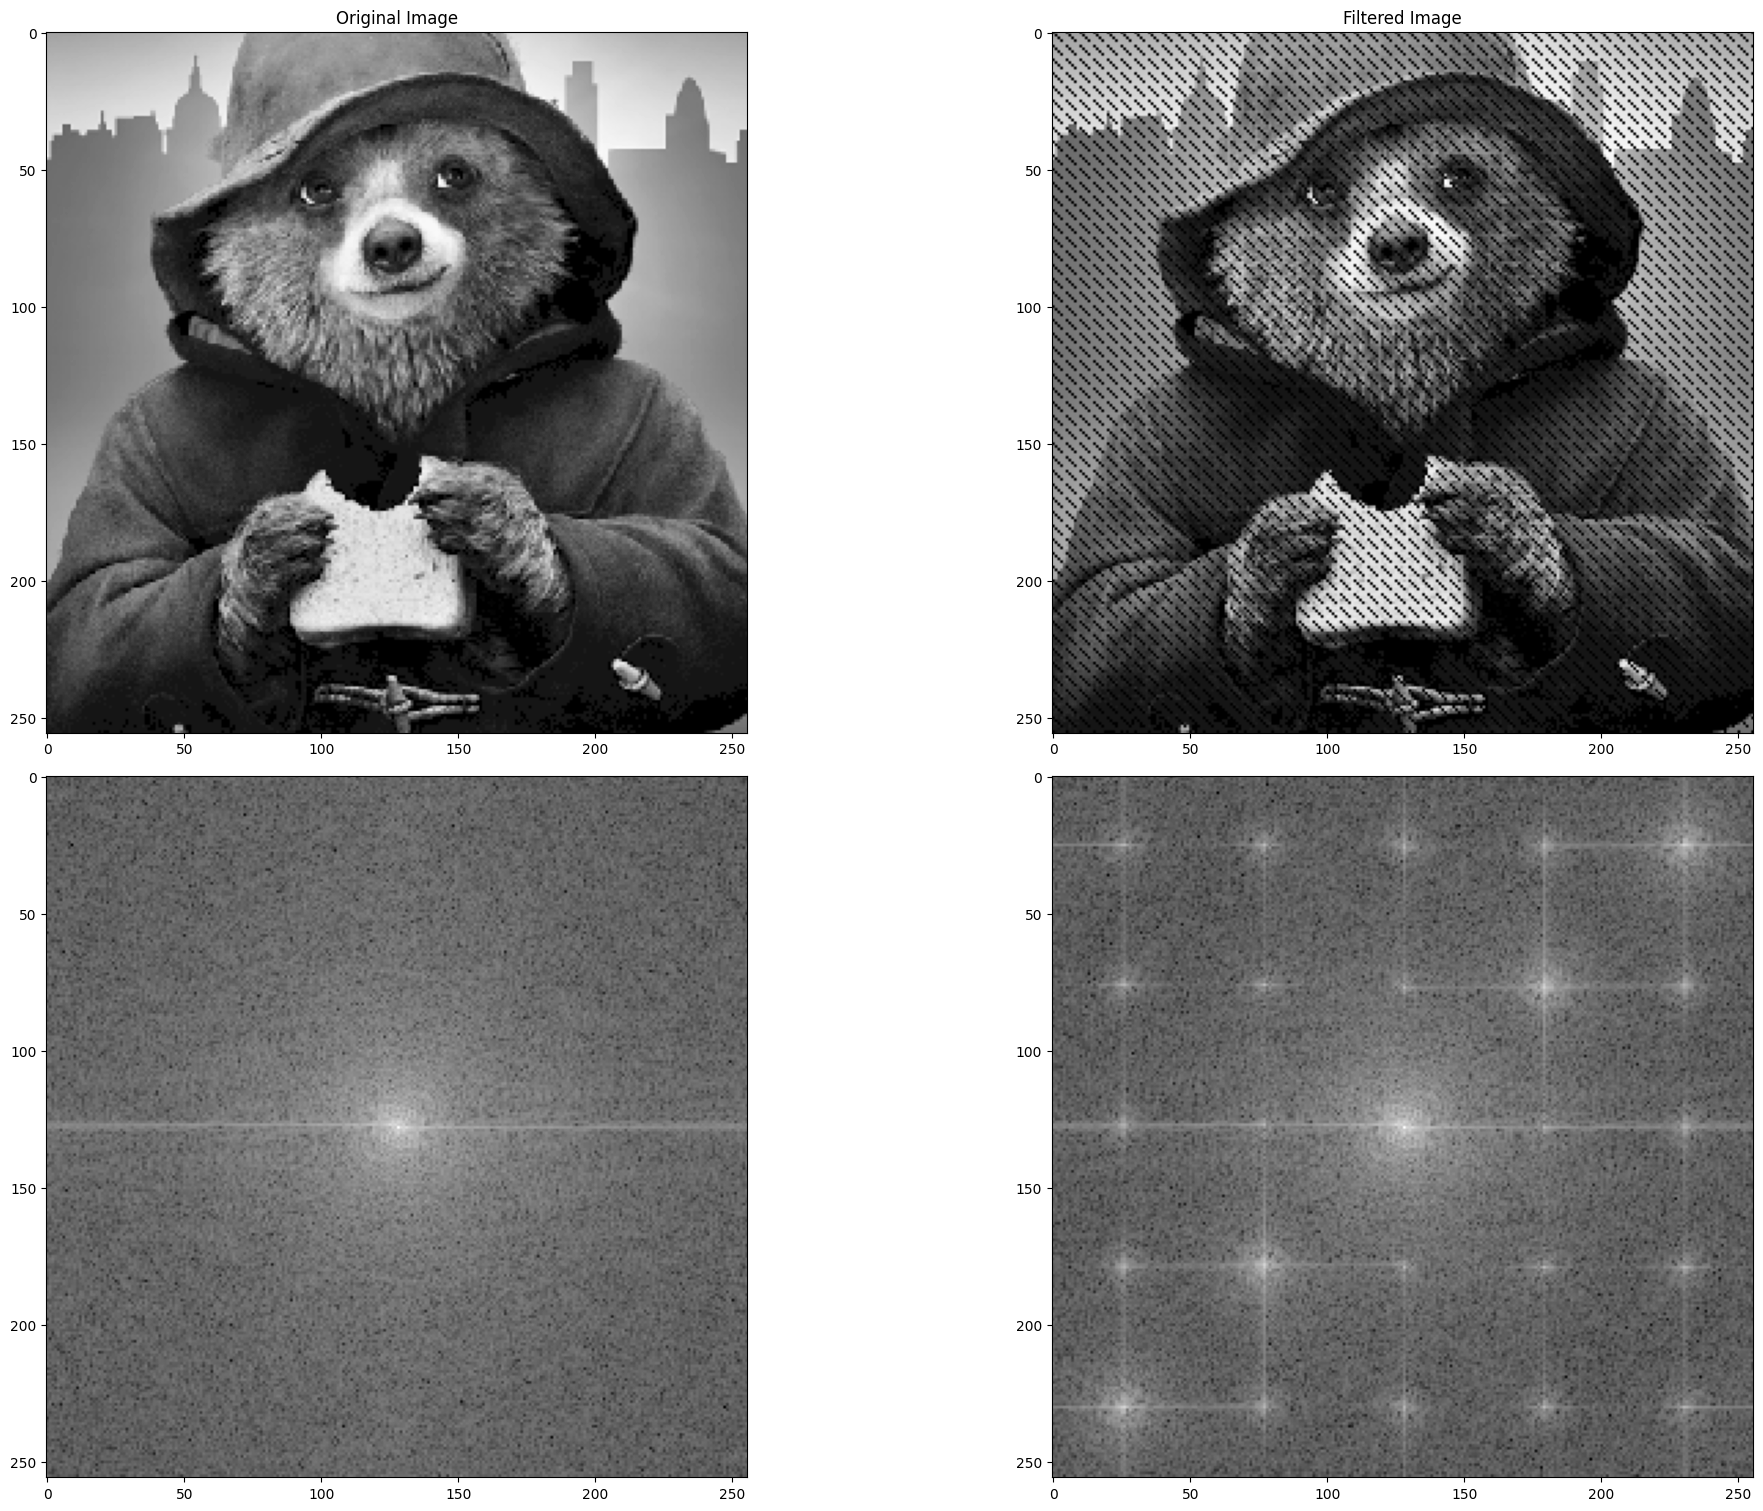

In [71]:
mask = np.ones(img.shape)

for size in range(4):
    for i in range(size, img.shape[0], 5):
        for j in range(size,img.shape[1], 5):
            mask[i][j] = 0

filter_img = filter(mask, img)
fft_filtered_img = fft(filter_img.flatten())
fft_filtered = fft_shift(fft_filtered_img.reshape(256,256))

fft_img = fft(img.flatten())
fft_center = fft_shift(fft_img.reshape(256,256))

plt.figure(figsize=(20, 15), constrained_layout=False)

plt.subplot(221), plt.imshow(np.abs(img), 'gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(np.abs(filter_img), 'gray'), plt.title('Filtered Image')
plt.subplot(223), plt.imshow(np.log(1+np.abs(fft_center)), 'gray')
plt.subplot(224), plt.imshow(np.log(1+np.abs(fft_filtered)), 'gray')
plt.show()

### Part 4: Construction of Hybrid Images (Optional)

In [ ]:
# Task 3: 1 extra point
def create_hybrid_image(lp_image, hp_image):
    '''
    Creates a hybrid image combining low pass features from one image
    with high pass features from the other

    Parameters
    -----------
    lp_image: np.ndarray
      FF transformed image whose low pass features are to be combined
    
    hp_image: np.ndarray
      FF transformed image whose high pass features are to be combined

    Returns:
    -----------------------
    hybrid_image: np.ndarray
        A numpy array of the combined high pass and low pass image
    '''
    # TODO: YOUR CODE HERE
    

    

In [ ]:
img1 = cv2.imread('./bean1.jpeg', 0)
img2 = cv2.imread('./bean2.jpeg', 0)
img1 = cv2.resize(img1, (256, 256), interpolation = cv2.INTER_NEAREST)
img2 = cv2.resize(img2, (256, 256), interpolation = cv2.INTER_NEAREST)

orig1 = fft(img1)
orig2 = fft(img2)

plt.figure(figsize=(20, 15), constrained_layout=False)

plt.subplot(131), plt.imshow(img1, "gray"), plt.title("Image 1")
plt.subplot(132), plt.imshow(img2, "gray"), plt.title("Image 2")
plt.subplot(133), plt.imshow(create_hybrid_image(orig1, orig2), "gray"), plt.title("Hybrid Image")
plt.show()